In [2]:
import numpy as np
import pandas as pd
import matplotlib as mplt
import matplotlib.pyplot as plt
import functools

In [31]:
df = pd.read_csv("../data/read_frame_times.csv").drop(4)

In [30]:
df['time'].mean()

9396.745992601725

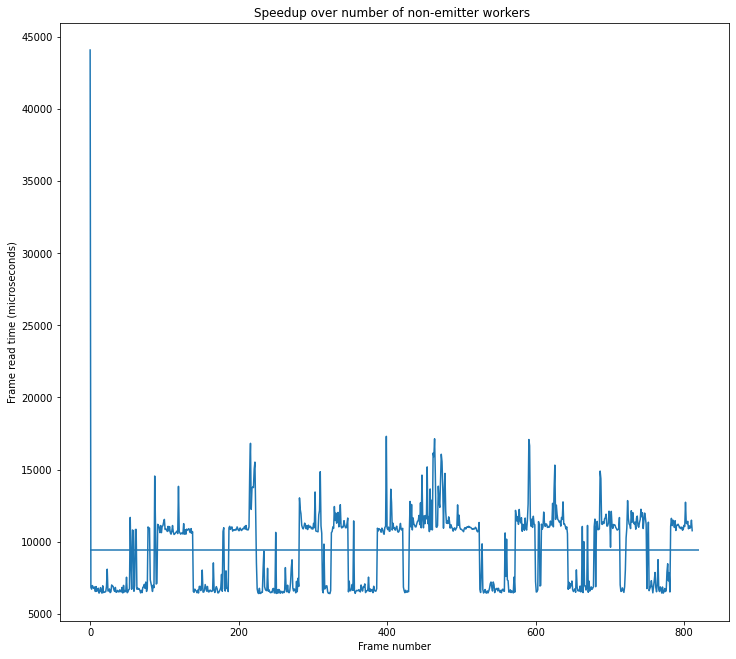

In [33]:
plt.plot(df)
plt.gcf().set_size_inches(12, 11) 
plt.ylabel("Frame read time (microseconds)")
plt.xlabel("Frame number")
plt.hlines(df['time'].mean(), xmin=0, xmax=820)
plt.title(f"Speedup over number of non-emitter workers ")
plt.show()

# Completion time

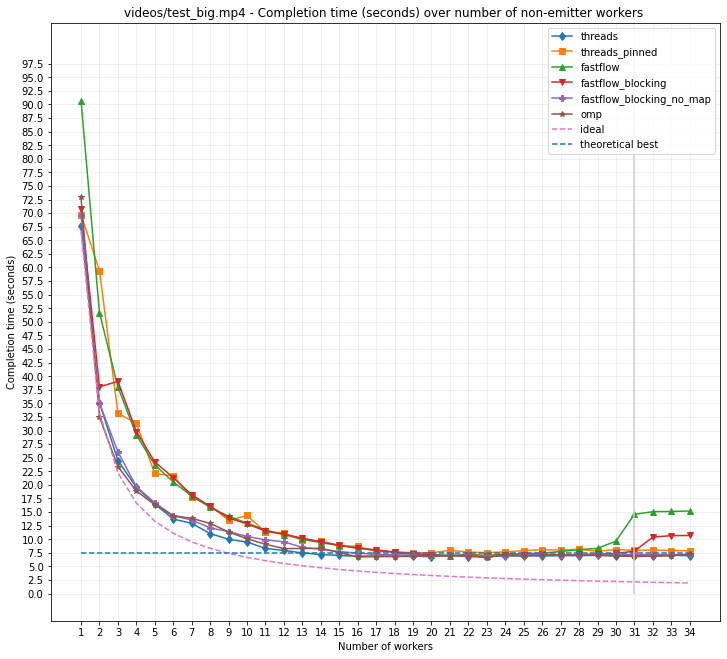

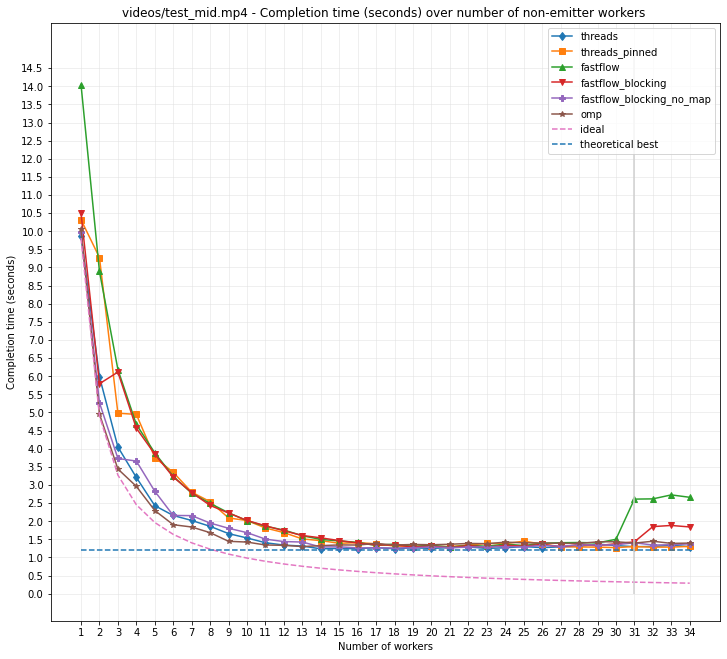

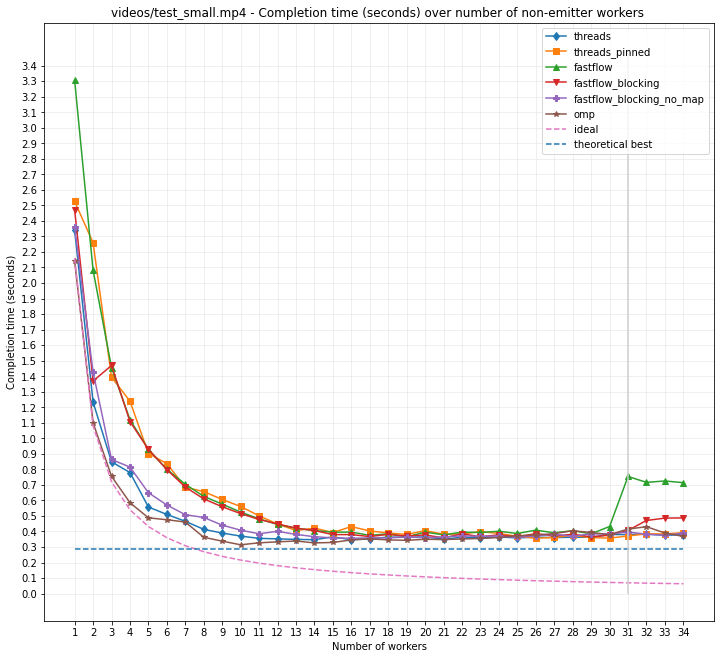

In [835]:
for f in filenames:
    plt.gcf().set_size_inches(12, 11) 
    def seq(n): return sequentials[sequentials['filename'] == f][n].values[0]
    for p, m, d in programs:
        y = df[(df['name'] == 'bin/'+p) & (df['filename'] == f)]['avg']
        #e = df[(df['name'] == p) & (df['filename'] == f)]['std']
        plt.plot(all_n_workers, y/1e6, d, label=p, marker=m)
    plt.grid(color='#e0e0e0', linestyle='-', linewidth=0.5)
    plt.plot(all_n_workers, seq('total_time')/1e6/all_n_workers, '--', label='ideal')
    plt.xticks(all_n_workers)
    
    plt.hlines((seq('read_time')*seq('frames')+seq('init_time'))/1e6, xmin=1, xmax=34, linestyle='--',label='theoretical best')
    
    if f == 'videos/test_big.mp4':
        plt.yticks([x*2.5 for x in range(0,40,1)])
        plt.vlines(31, ymin=0, ymax=40*2.5, color='#d0d0d0', linestyle='-')
    if f == 'videos/test_mid.mp4':
        plt.yticks([x*0.5 for x in range(0,30,1)])
        plt.vlines(31, ymin=0, ymax=30*0.5, color='#d0d0d0', linestyle='-')
    if f == 'videos/test_small.mp4':
        plt.yticks([x*0.1 for x in range(0,35,1)])
        plt.vlines(31, ymin=0, ymax=35*0.1, color='#d0d0d0', linestyle='-')

    plt.legend()
    plt.ylabel("Completion time (seconds)")
    plt.xlabel("Number of workers")
    plt.title(f"{f} - Completion time (seconds) over number of non-emitter workers ")
    plt.savefig(f'completion_time_{crop_slash(f)}.svg')  
    plt.show()

# Efficiency

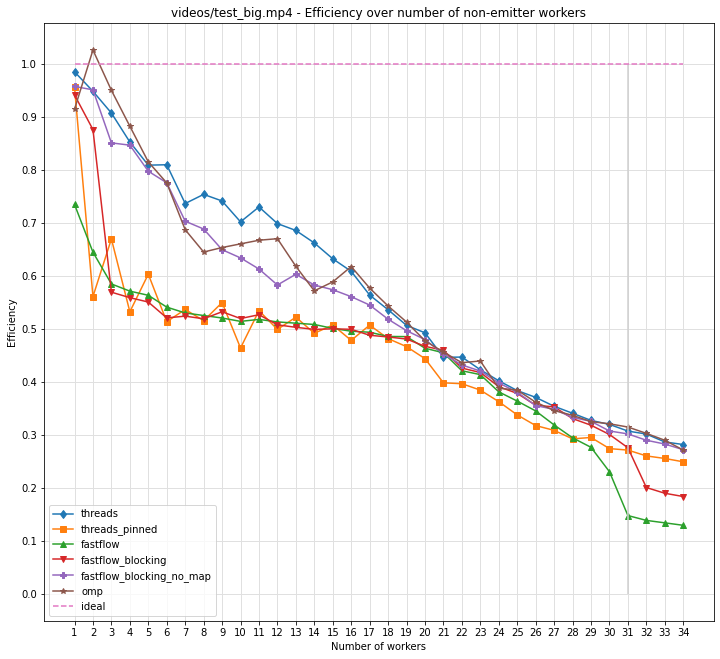

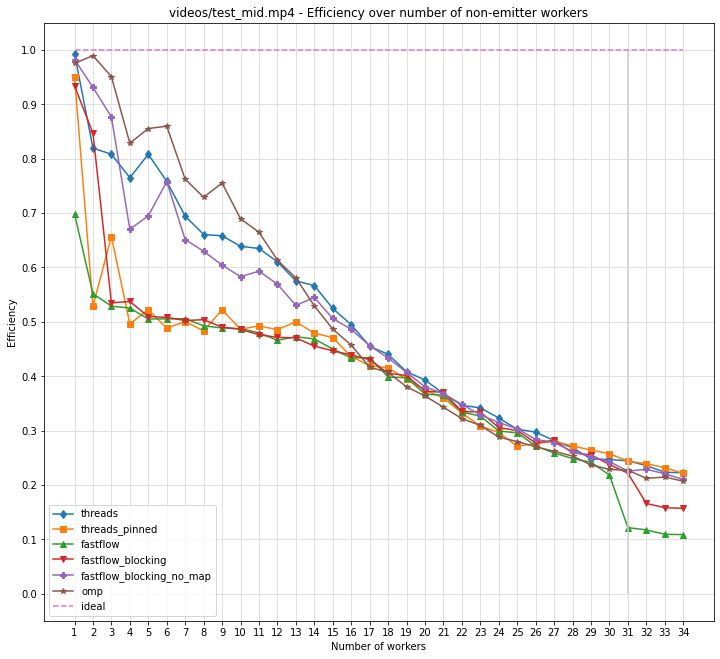

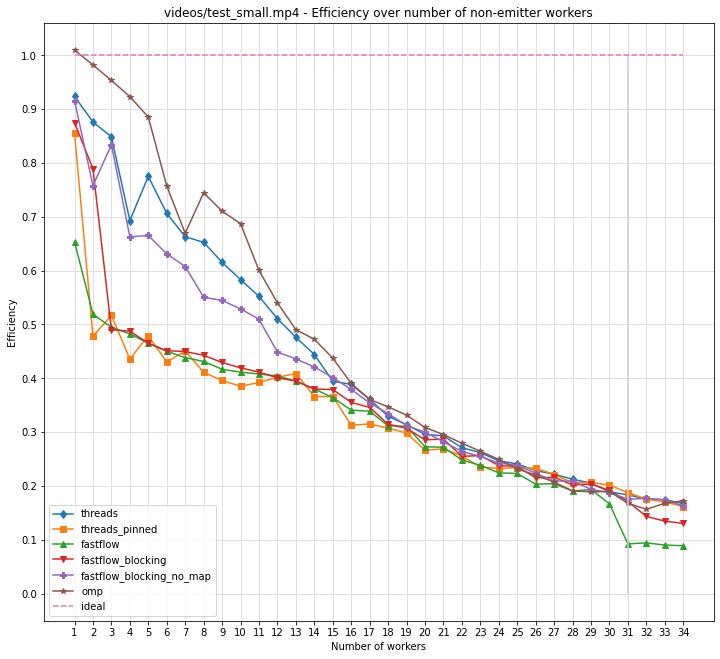

In [836]:
for f in filenames:
    plt.gcf().set_size_inches(12, 11) 
    def seq(n): return sequentials[sequentials['filename'] == f][n].values[0]
    for p, m, d in programs:
        y = (seq('total_time') / all_n_workers) / df[(df['name'] == 'bin/'+p) & (df['filename'] == f)]['avg']
        plt.plot(all_n_workers, y, d, label=p, marker=m)
    plt.grid(color='#e0e0e0', linestyle='-', linewidth=1)
    plt.yticks([x*0.1 for x in range(0,11,1)])
    plt.gca().get_yaxis().set_major_formatter(mplt.ticker.ScalarFormatter())
    plt.gca().get_yaxis().get_major_formatter().labelOnlyBase = False
    plt.vlines(31, ymin=0, ymax=1, color='#d0d0d0', linestyle='-')

    plt.plot(all_n_workers, all_n_workers * 0 + 1, '--', label='ideal')
    plt.xticks(all_n_workers)

    plt.legend()
    plt.ylabel("Efficiency")
    plt.xlabel("Number of workers")
    plt.title(f"{f} - Efficiency over number of non-emitter workers")
    plt.savefig(f'efficiency_{crop_slash(f)}.svg')  
    plt.show()